<a href="https://colab.research.google.com/github/philipgp/Colab/blob/master/Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Data preprocessing

**Import data.csv**

In [0]:
data = pd.read_csv("/content/drive/My Drive/Data.csv")
X = data.iloc[:,:-1].values
y=data.iloc[:,3].values

Imputer


In [4]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer = imputer.fit(X[:,1:3])
X[:,1:3] = imputer.fit_transform(X[:,1:3])

ImportError: ignored

In [5]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelEncoder_X = LabelEncoder()
X[:,0] =labelEncoder_X.fit_transform(X[:,0])
onhotEncoder_X = OneHotEncoder(categorical_features=[0]);
X=onhotEncoder_X.fit_transform(X).toarray()
labelEncoderY = LabelEncoder();
y=labelEncoderY.fit_transform(y)

TypeError: ignored

**Split Train-Test**

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=0)


**Feature Scale**

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X =StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Linear Regression

**Load Data**


In [0]:
data = pd.read_csv("/content/drive/My Drive/Salary_Data.csv")
X=data.iloc[:,0].values
y=data.iloc[:,1].values


**Split Train-Test**

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =1/3,random_state=0)


**Do Simple Linear Regression**

Text(0, 0.5, 'Salary')

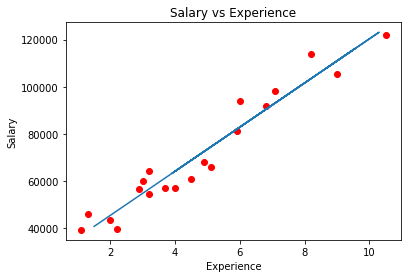

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
regressor.fit(X_train,y_train)
y_pred =regressor.predict(X_test)[:,0]
plt.scatter(X_train,y_train,color='red')
#plt.scatter(X_test,y_test,color='green')
plt.plot(X_test,y_pred)
plt.title('Salary vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')


# Multiple Linear Regression

**Import Data**

In [0]:
data = pd.read_csv("/content/drive/My Drive/50_Startups.csv")


In [0]:
X = data.iloc[:,:-1].values
y=data.iloc[:,4].values

In [0]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
labelEncoder_X = LabelEncoder()
X[:,3] =labelEncoder_X.fit_transform(X[:,3])
ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
X = ct.fit_transform(X)

**Remove first column to escape from 'dummy variable' trap**

In [32]:
X=X[:,1:] 

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 86419.7

**Split the data**

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=0)


In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [43]:
#regressor.fit(X_train,y_train)
#y_pred =regressor.predict(X_test)
#plt.scatter(X_train,y_train,color='red')
#plt.scatter(X_test,y_test,color='green')
#plt.plot(X_test,y_pred)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845175,  71976.09851259,
       178537.48221054, 116161.24230163,  67851.69209676,  98791.73374688,
       113969.43533012, 167921.0656955 ])